# Aula 03 - 17/10/24

## README
Crie uma pasta de dados no diretório 2024. Alternativamente, você pode criar uma pasta no mesmo diretório deste jupyter notebook com o nome de dados

In [61]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
# Extraindo o diretório que estamos trabalhando
cwd = os.getcwd()
cwd

# Estabelecendo a pasta de dados que quero utilizar
dataPath = os.path.dirname(cwd) + '\\dados_entrada'
print('Diretório de dados: '+ dataPath)

# Listas documentos que estão dentro da pasta de dados
dataList = os.listdir(dataPath)
print(dataList)

Diretório de dados: C:\Users\bruno\Desktop\UFSC\2024.2\ENS410064\2024\dados_entrada
['dados_T1', 'metar_SBFL_2000.csv', 'metar_SBFL_2001.csv']


In [45]:
# Extraindo os anos dos dados
years = []
for dl in dataList:
    if os.path.isfile(dataPath + "\\" + dl):
        years.append(dl.split('_')[-1].split('.')[0])

years = np.unique(years)
print(years)

# Extraindo os anos dos dados
stations = []
for dl in dataList:
    if os.path.isfile(dataPath + "\\" + dl):
        stations.append(dl.split('_')[-2])

stations = np.unique(stations)
print(stations)

['2000' '2001']
['SBFL']


In [52]:
# Listando arquivos com o nome iniciando em metar

prefixed = [filename for filename in os.listdir(dataPath) if filename.startswith('metar')]
print(prefixed)

['metar_SBFL_2000.csv', 'metar_SBFL_2001.csv']


In [51]:
# Lendo todos os arquivos da pasta
dataAll = []
for dl in dataList:
    if os.path.isfile(dataPath + "\\" + dl):
        data = pd.read_csv(dataPath + "\\"+dl)
        dataAll.append(data)

# Concatenando a lista de dados
dataAll = pd.concat(dataAll)
print(dataAll)

      day  month  year  hour  ct     wd        ws  hc  ccp  cco            p  \
0       1      1  2000     0 NaN  160.0  2.572220 NaN  NaN  NaN  1009.675199   
1       1      1  2000     1 NaN  160.0  3.086664 NaN  NaN  NaN  1009.675199   
2       1      1  2000     2 NaN  180.0  2.057776 NaN  NaN  NaN  1009.675199   
3       1      1  2000     3 NaN  200.0  1.543332 NaN  NaN  NaN  1009.675199   
4       1      1  2000     4 NaN  160.0  1.543332 NaN  NaN  NaN  1009.678792   
...   ...    ...   ...   ...  ..    ...       ...  ..  ...  ...          ...   
8563   31     12  2001    19 NaN   90.0  4.115552 NaN  NaN  NaN  1009.696761   
8564   31     12  2001    20 NaN   80.0  3.601108 NaN  NaN  NaN  1009.696761   
8565   31     12  2001    21 NaN   80.0  2.572220 NaN  NaN  NaN  1009.696761   
8566   31     12  2001    22 NaN  110.0  2.572220 NaN  NaN  NaN  1009.696761   
8567   31     12  2001    23 NaN  120.0  1.543332 NaN  NaN  NaN  1009.693167   

           temp     dpTemp  vis  pw    

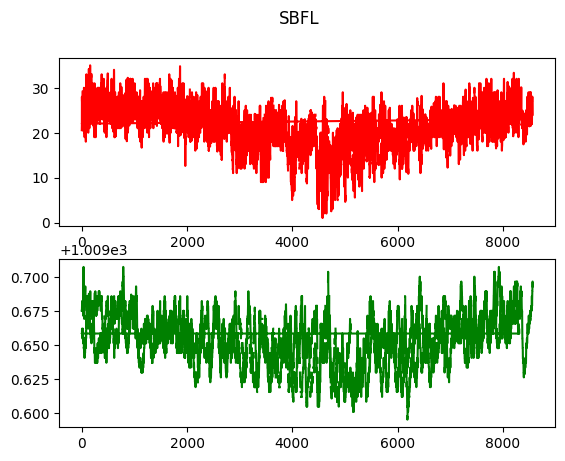

In [73]:
# Condicionando a leitura para apenas uma estação


for st in stations:
    dataAll = []
    for year in years:
        try:
            data = pd.read_csv(dataPath + '\\' + 'metar_' + st + '_' + year+'.csv')
            dataAll.append(data)
        except:
            print('não tem a estação ou o ano')
    

    dataAll = pd.concat(dataAll)

    # Criando as pastas das figuras
    os.makedirs(os.path.dirname(cwd) + '\\figuras\\' + st, exist_ok = True)
    
    fig, ax = plt.subplots(2)
    ax[0].plot(dataAll.temp, color = 'red')
    ax[1].plot(dataAll.p, color = 'green')
    fig.suptitle(st)

    # Salvando as figuras
    fig.savefig(os.path.dirname(cwd) + '\\figuras\\' + st + '\\timeseries_' + st + '_' + years[0] + 'to' + years[-1] + '.png')